#### import required libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Load the training and testing dataset.

In [4]:
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv')
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv')

#### Checking shape of train and test data

In [5]:
print(df_test.shape)
print(df_test_label.shape)
print(df_train.shape)
print(df_train_label.shape)

(2178, 9)
(2177, 1)
(8708, 9)
(8707, 1)


#### DataType of all column

In [6]:
df_test.dtypes
df_test_label.dtypes
df_train.dtypes
df_train_label.dtypes

504    int64
dtype: object

#### check the Missing Value 

In [7]:
df_test.isnull()
df_test_label.isnull()
df_train.isnull()
df_train_label.isnull()

,504
0,False
1,False
2,False
3,False
4,False
...,...
8702,False
8703,False
8704,False
8705,False


#### Crete new column with the help of datetime column

In [8]:
df_test['date'] = pd.DatetimeIndex(df_test['datetime']).date
df_test['hour'] = pd.DatetimeIndex(df_test['datetime']).hour
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_test['weekDay'] = pd.DatetimeIndex(df_test['datetime']).weekday.map(dayOfWeek)
nameOfMonth={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df_test['month'] = pd.DatetimeIndex(df_test['datetime']).month.map(nameOfMonth)

df_train['date'] = pd.DatetimeIndex(df_train['datetime']).date
df_train['hour'] = pd.DatetimeIndex(df_train['datetime']).hour
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_train['weekDay'] = pd.DatetimeIndex(df_train['datetime']).weekday.map(dayOfWeek)
nameOfMonth={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df_train['month'] = pd.DatetimeIndex(df_train['datetime']).month.map(nameOfMonth)

#### Coercing To Category Type

In [9]:
categoryVariableList = ["season","weather","holiday","workingday"]
for var in categoryVariableList:
    df_test[var] = df_test[var].astype("category")
    df_train[var] = df_train[var].astype("category")

#### Dropping Unncessary Columns

In [10]:
df_test  = df_test.drop(["datetime"],axis=1)
df_train  = df_train.drop(["datetime"],axis=1)

#### Apend the dataset

In [11]:
mylist = [df_test_label.columns.values.tolist()] + df_test_label.values.tolist()
df_test['Total_booking'] = np.array(mylist)
df_test['Total_booking'] = df_test['Total_booking'].astype("int64")
mylist = [df_train_label.columns.values.tolist()] + df_train_label.values.tolist()
df_train['Total_booking'] = np.array(mylist)
df_train['Total_booking'] = df_train['Total_booking'].astype("int64")

#### Outliers Analysis

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Total_booking'),
 Text(0.5, 1.0, 'Box Plot On Total_booking Across Working Day')]

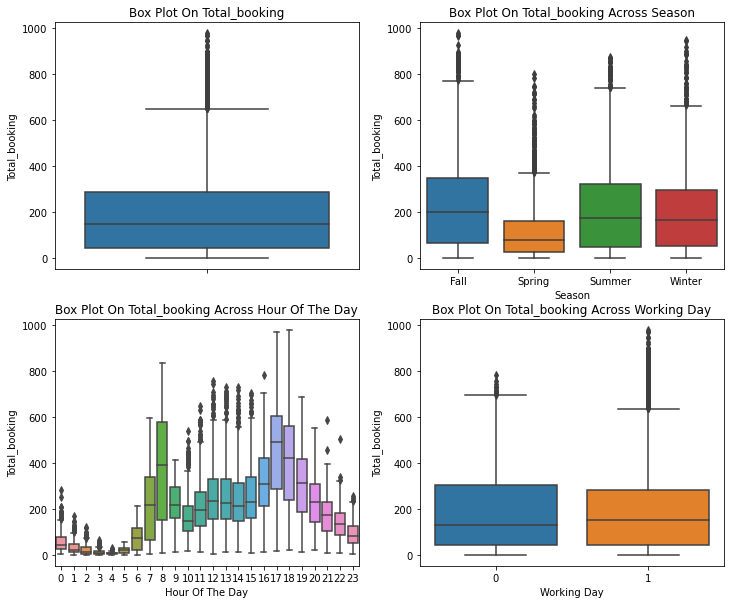

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=df_train,y="Total_booking",orient="v",ax=axes[0][0])
sn.boxplot(data=df_train,y="Total_booking",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=df_train,y="Total_booking",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=df_train,y="Total_booking",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Total_booking',title="Box Plot On Total_booking")
axes[0][1].set(xlabel='Season', ylabel='Total_booking',title="Box Plot On Total_booking Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Total_booking',title="Box Plot On Total_booking Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Total_booking',title="Box Plot On Total_booking Across Working Day")

#### Remove Outliers In The Count Column

In [13]:
df_trainWithoutOutliers = df_train[np.abs(df_train["Total_booking"]-df_train["Total_booking"].mean())<=(3*df_train["Total_booking"].std())]
print ("Shape Of The Before Ouliers: ",df_train.shape)
print ("Shape Of The After Ouliers: ",df_trainWithoutOutliers.shape)

Shape Of The Before Ouliers:  (8708, 13)
Shape Of The After Ouliers:  (8591, 13)


#### Correlation Analysis

<AxesSubplot:>

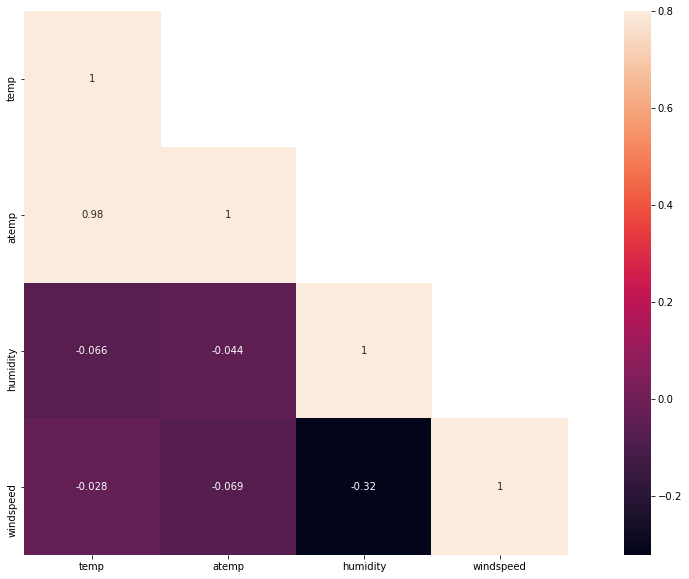

In [14]:
corrMatt = df_train[["temp","atemp","humidity","windspeed"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

#### Visualization of data

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.77290246, -3.54563229, -3.42075996, ...,  3.42075996,
          3.54563229,  3.77290246]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.59850903, 6.60394382,
         6.60394382])),
 (1.3448191117317758, 4.574704492098911, 0.9574275569332262))

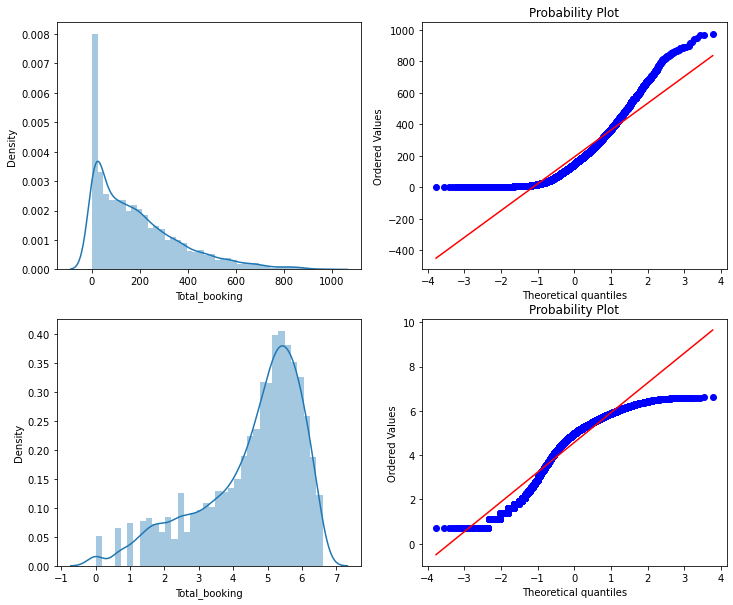

In [16]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(df_train["Total_booking"],ax=axes[0][0])
stats.probplot(df_train["Total_booking"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(df_trainWithoutOutliers["Total_booking"]),ax=axes[1][0])
stats.probplot(np.log1p(df_trainWithoutOutliers["Total_booking"]), dist='norm', fit=True, plot=axes[1][1])


(array([1.056e+03, 0.000e+00, 6.820e+02, 1.713e+03, 8.530e+02, 8.240e+02,
        7.640e+02, 6.560e+02, 9.420e+02, 2.980e+02, 2.200e+02, 1.900e+02,
        1.560e+02, 1.720e+02, 7.000e+01, 4.500e+01, 1.900e+01, 2.700e+01,
        6.000e+00, 7.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 0.      ,  2.279876,  4.559752,  6.839628,  9.119504, 11.39938 ,
        13.679256, 15.959132, 18.239008, 20.518884, 22.79876 , 25.078636,
        27.358512, 29.638388, 31.918264, 34.19814 , 36.478016, 38.757892,
        41.037768, 43.317644, 45.59752 , 47.877396, 50.157272, 52.437148,
        54.717024, 56.9969  ]),
 <BarContainer object of 25 artists>)

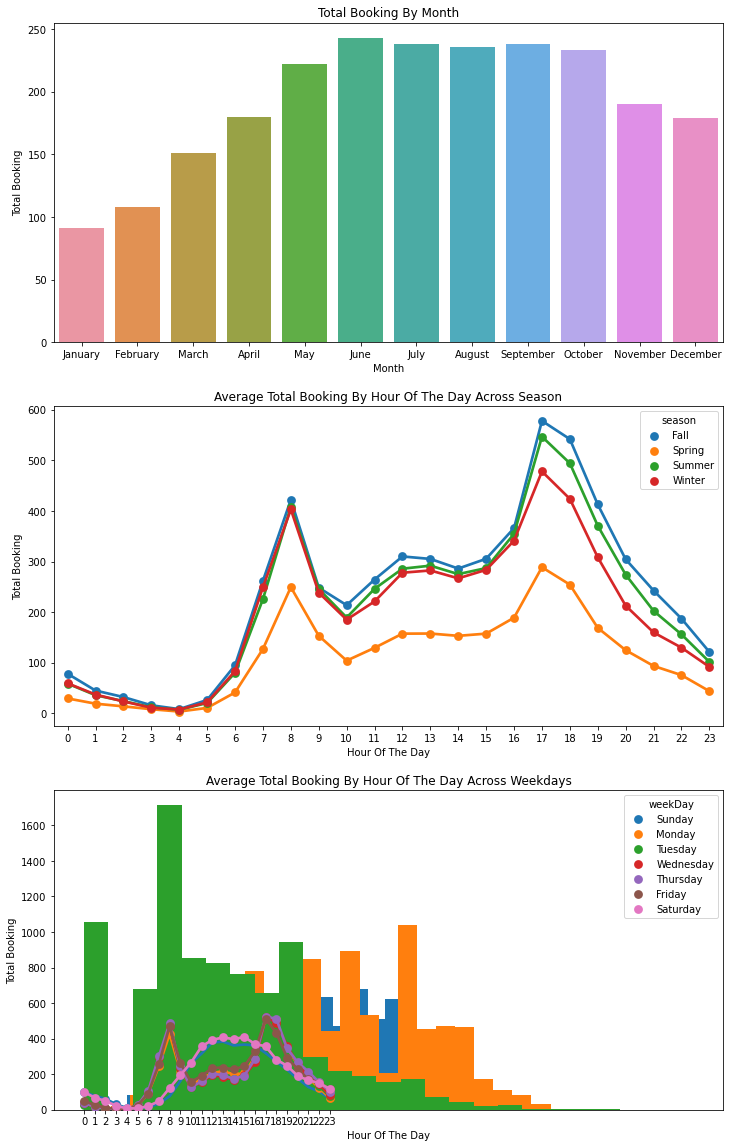

In [17]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df_train.groupby("month")["Total_booking"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="Total_booking",ascending=False)
sn.barplot(data=monthSorted,x="month",y="Total_booking",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Total Booking',title="Total Booking By Month",label='big')
hourAggregated = pd.DataFrame(df_train.groupby(["hour","season"],sort=True)["Total_booking"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["Total_booking"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Total Booking',title="Average Total Booking By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df_train.groupby(["hour","weekDay"],sort=True)["Total_booking"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["Total_booking"],hue=hourAggregated["weekDay"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Total Booking',title="Average Total Booking By Hour Of The Day Across Weekdays",label='big')

plt.hist(df_train['temp'],bins=25)
plt.hist(df_train['atemp'],bins=25)
plt.hist(df_train['windspeed'],bins=25)

#### combine the data set

In [18]:
data = df_train.append(df_test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

#### Convert the categorical variables into one hot vector

In [19]:
onehotencoder = OneHotEncoder()
sea = np.array(data.season.values)
P = onehotencoder.fit_transform(sea.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(P, columns = ["season_"+str(int(i)) for i in range(P.shape[1])]) 
df = pd.concat([data, dfOneHot], axis=1)
df= df.drop(['season'], axis=1)
onehotencoder = OneHotEncoder()
wea = np.array(df.weather.values)
P = onehotencoder.fit_transform(wea.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(P, columns = ["weather_"+str(int(i)) for i in range(P.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['weather'], axis=1)
onehotencoder = OneHotEncoder()
hol = np.array(df.holiday.values)
P = onehotencoder.fit_transform(hol.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(P, columns = ["holiday_"+str(int(i)) for i in range(P.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['holiday'], axis=1)
onehotencoder = OneHotEncoder()
wor = np.array(df.workingday.values)
P = onehotencoder.fit_transform(wor.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(P, columns = ["workingday_"+str(int(i)) for i in range(P.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['workingday'], axis=1)

#### Removing unused columns

In [20]:
df = df.drop('date', axis=1)
df = df.drop('weekDay', axis=1)
df = df.drop('month', axis=1)
X = df.drop('Total_booking', axis=1)
y = df['Total_booking']

#### Divide the data into training and testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit Model through Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor() # default values of all hyperparameters are used
rfr.fit(X_train, y_train) # all math executed by the library !!!! 
y_pred = rfr.predict(X_test)

#### Grid search to find the best parameters

In [25]:
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
        'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
        'max_depth': [5,10,15], # range(5,25,5)
        'min_samples_split': [5,10],
        'min_samples_leaf': [5,10],
        'max_features': ['auto', 'sqrt', 'log2']
        }
cv = GridSearchCV(estimator=rfr,
                  cv=n_folds,
                  param_grid=parameters,
                  n_jobs=-1,
                  verbose=3)
cv.fit(X_train, y_train)

In [ ]:
print(cv.best_estimator_)

#### final model

In [ ]:
rfr_final = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rfr_final.fit(X_train, y_train)
y_pred_final = rfr_final.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred_final)
print("Mean Squared Log Error : "+msle)

# Fit Model through Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor() # default values of all hyperparameters are used
abr.fit(X_train, y_train) # all math executed by the library !!!! 
y_pred = abr.predict(X_test)
# Grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
        'n_estimators': [10,50,100],
        'learning_rate': [0.5,1.0,1.5], 
        'loss': ['linear','square','exponential']
        }
cv = GridSearchCV(estimator=abr,
                  cv=n_folds,
                  param_grid=parameters,
                  n_jobs=-1,
                  verbose=3)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
print(cv.best_score_)
# final model
rfr_final = AdaBoostRegressor(loss='square')
rfr_final.fit(X_train, y_train)
y_pred_final = rfr_final.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred_final)
print(msle)

# Fit Model through Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor() # default values of all hyperparameters are used
br.fit(X_train, y_train) # all math executed by the library !!!! 
y_pred = br.predict(X_test)
# Grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
        'n_estimators': [10,20,30],
        'max_samples': [0.5,1.0,1.5], 
        'max_features': [0.5,1.0,1.5]
        }
cv = GridSearchCV(estimator=br,
                  cv=n_folds,
                  param_grid=parameters,
                  n_jobs=-1,
                  verbose=3)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
print(cv.best_score_)
# final model
rfr_final = BaggingRegressor(max_samples=0.5, n_estimators=30)
rfr_final.fit(X_train, y_train)
y_pred_final = rfr_final.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred_final)
print(msle)

# Fit Model through SVR Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR() # default values of all hyperparameters are used
svr.fit(X_train, y_train) # all math executed by the library !!!! 
y_pred = svr.predict(X_test)
# Grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
        'degree': [3,6,9], 
        'gamma': ['scale','auto']
        }
cv = GridSearchCV(estimator=svr,
                  cv=n_folds,
                  param_grid=parameters,
                  n_jobs=-1,
                  verbose=3)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
print(cv.best_score_)
# final model
rfr_final = SVR()
rfr_final.fit(X_train, y_train)
y_pred_final = rfr_final.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred_final)
print(msle)

# Fit Model through K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor() # default values of all hyperparameters are used
knr.fit(X_train, y_train) # all math executed by the library !!!! 
y_pred = knr.predict(X_test)
# Grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
        'n_neighbors': [5,10,15], 
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute']
        }
cv = GridSearchCV(estimator=knr,
                  cv=n_folds,
                  param_grid=parameters,
                  n_jobs=-1,
                  verbose=3)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
print(cv.best_score_)
# final model
rfr_final = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')
rfr_final.fit(X_train, y_train)
y_pred_final = rfr_final.predict(X_test)
print(mean_squared_error(y_test, y_pred_final))
msle = mean_squared_log_error(y_test, y_pred_final)
print(msle)
